# Data Overview

In [2]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading all dataframes
df_orders = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\instacart-analysis\instacart_orders.csv", sep=';')
df_products = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\instacart-analysis\products.csv", sep=';')
df_aisles = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\instacart-analysis\aisles.csv", sep=';')
df_departments = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\instacart-analysis\departments.csv", sep=';')
df_order_products = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\instacart-analysis\order_products.csv", sep=';')

In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [8]:
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


# Preparing data

### DataFrame `orders`

In [11]:
# Checking for duplicates
print(df_orders.duplicated().sum())

15


In [12]:
# Removing duplicates
df_orders = df_orders.drop_duplicates()

In [13]:
# Verificando as linhas duplicadas mais uma vez
print(df_orders.duplicated().sum())

0


In [14]:
# Checking for missing values
print(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


<span style="color: black; font-family: Arial; font-size: 20px;">
There are missing values only on the 'days_since_prior_order' column

### DataFrame `products`

In [17]:
# Checking for duplicates
print(df_products.duplicated().sum())

0


In [18]:
# Checking for missing values
print(df_products.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [19]:
# Checking for duplicated product names that are not missing
df_products[~(df_products['product_name'].isna()) & (df_products['product_name'].str.lower().duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [20]:
# Checking for missing values in the 'product_name' column
print(df_products['product_name'].value_counts(dropna=False))

product_name
NaN                                      1258
Chocolate Sandwich Cookies                  1
Krinkle Cut Carolina BBQ Potato Chips       1
Fresh Ground Turkey- 85% Lean/15% Fat       1
Organic Unsweetened Ketchup                 1
                                         ... 
Organic Fresh Carrot Chips                  1
Unbleached Jumbo Baking Cups                1
Super Glue Gel Control                      1
3 Cheese Ravioli                            1
BURRITO- STEAK & CHEESE                     1
Name: count, Length: 48437, dtype: int64


<span style="color: black; font-family: Arial; font-size: 20px;">
There are 1258 NaN missing values

<span style="color: blue; font-family: Arial; font-size: 20px;">
Check if all missing product names are associated with aisle ID 100

In [23]:
dfr=df_products[df_products['product_name'].isna()]
dfr['aisle_id'].unique()

array([100], dtype=int64)

<span style="color: black; font-family: Arial; font-size: 20px;">
Yes, all missing product names are associate with aisle ID 100

<span style="color: blue; font-family: Arial; font-size: 20px;">
Check if all missing product names are associated with department ID 21

In [26]:
dfrt = dfr[dfr['aisle_id']==100]['department_id']
print(dfrt)

37       21
71       21
109      21
296      21
416      21
         ..
49552    21
49574    21
49640    21
49663    21
49668    21
Name: department_id, Length: 1258, dtype: int64


<span style="color: black; font-family: Arial; font-size: 20px;">
All missing product names are associated with department ID 21

<span style="color: blue; font-family: Arial; font-size: 20px;">
Fill in missing product names with 'Unknown'

In [29]:
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

### DataFrame `departments`

In [31]:
# Checking for duplicates
print(df_departments.duplicated().sum())

0


In [32]:
# Checking for missing values
print(df_departments.isna().sum())

department_id    0
department       0
dtype: int64


### DataFrame `aisles`

In [34]:
# Checking for duplicates
print(df_aisles.duplicated().sum())

0


In [35]:
# Checking for missing values
print(df_aisles.isna().sum())

aisle_id    0
aisle       0
dtype: int64


### DataFrame `order_products`

In [37]:
# Checking for duplicates
print(df_order_products.duplicated().sum())

0


In [38]:
# # Checking for missing values
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


<span style="color: blue; font-family: Arial; font-size: 20px;">
Replace missing values in column 'add_to_cart_order' with 999 and convert the column to integer type

In [40]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
print(df_order_products)
print()
df_order_products.info()

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_or

# Data Analysis

<span style="color: blue; font-family: Arial; font-size: 20px;">
Verify if the values in 'order_hour_of_day' and 'order_dow' columns make sense in the orders table ('order_hour_of_day' column values range from 0 to 23 and 'order_dow' range from 0 to 6)

<Axes: title={'center': 'Orders per hour per day'}, ylabel='Frequency'>

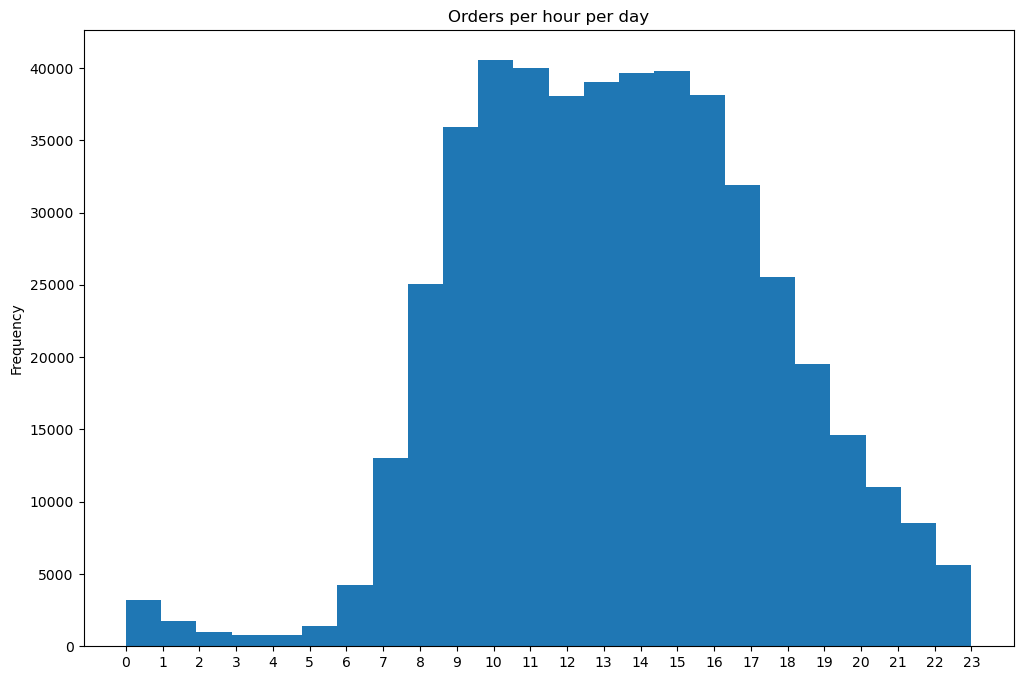

In [43]:
df_orders['order_hour_of_day'].plot.hist(title='Orders per hour per day', figsize=[12, 8], bins=24, xticks=list(range(0,24)))

<Axes: title={'center': 'Orders per day per week'}, ylabel='Frequency'>

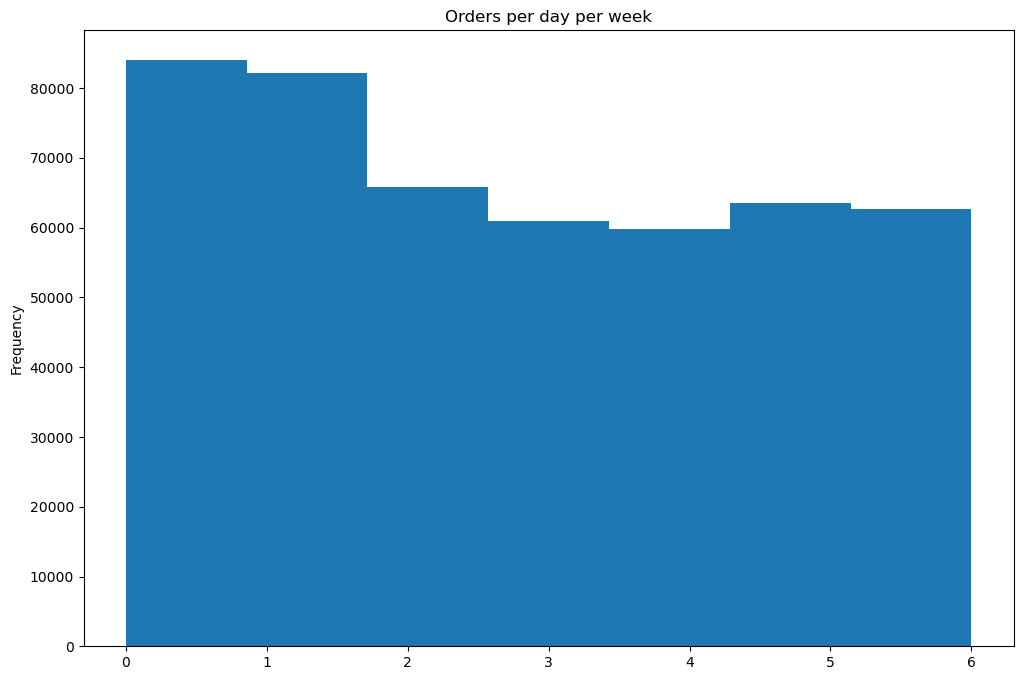

In [44]:
df_orders['order_dow'].plot.hist(title='Orders per day per week', figsize=[12, 8], bins=7, xticks=list(range(0,7)))

<span style="color: black; font-family: Arial; font-size: 20px;">
The values in columns 'order_hour_of_day' and 'order_dow' make sense because both are ending with 24 and 6, respectively.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Checking how many people make orders each hour of a day

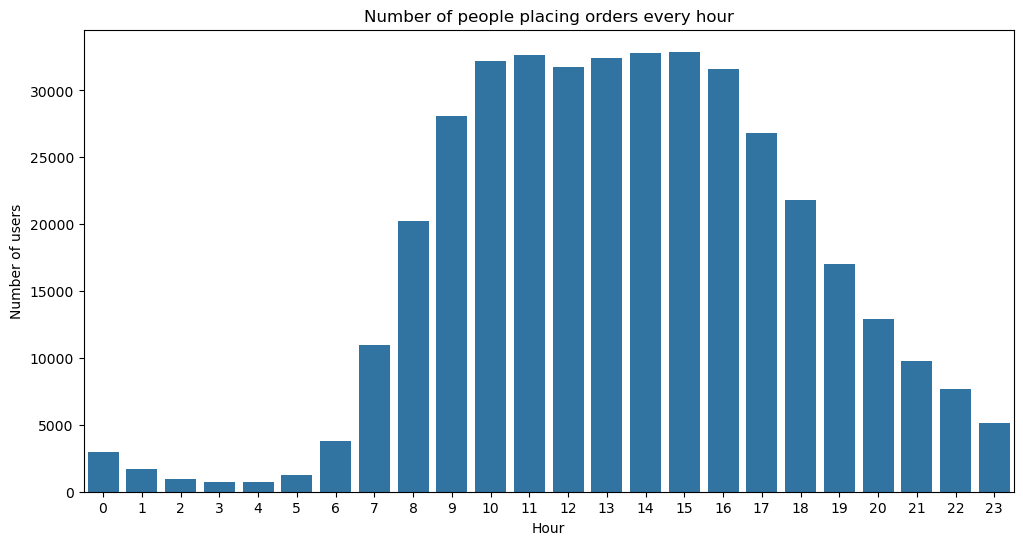

In [47]:
users_per_hour = df_orders.groupby('order_hour_of_day')['user_id'].nunique().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='order_hour_of_day', y= 'user_id', data=users_per_hour)
plt.xlabel('Hour')
plt.ylabel('Number of users')
plt.title('Number of people placing orders every hour')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Approximately 30,000 people place orders during peak hours, which are from 10am to 4pm

<span style="color: blue; font-family: Arial; font-size: 20px;">
What day in the week do people buy food products?

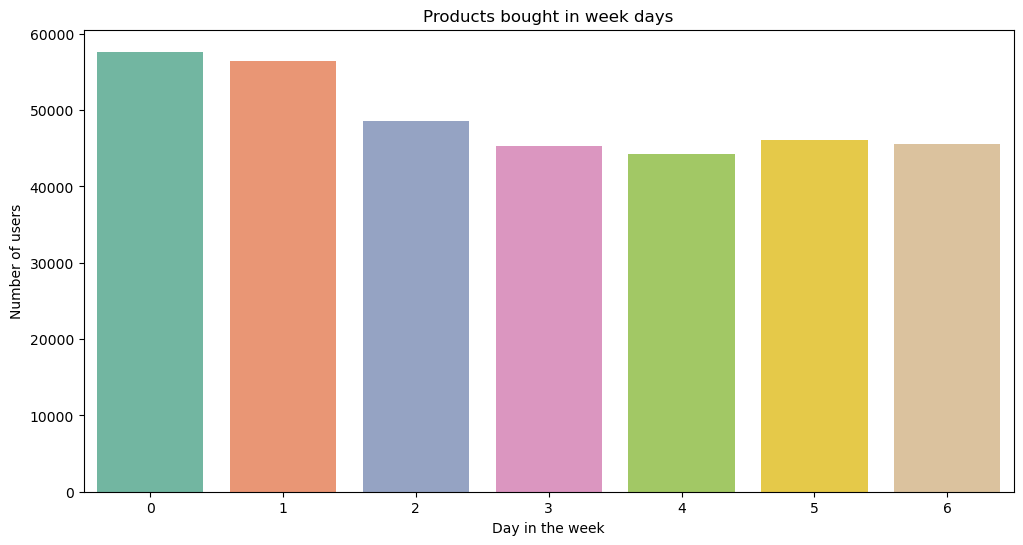

In [50]:
week_day = df_orders.groupby('order_dow')['user_id'].nunique().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='order_dow', y= 'user_id', data=week_day, hue='order_dow', palette='Set2', legend=False)
plt.xlabel('Day in the week')
plt.ylabel('Number of users')
plt.title('Products bought in week days')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
People buy food products every day but sunday is the day with the most people buying.

<span style="color: blue; font-family: Arial; font-size: 20px;">
How long do people wait before placing another order?

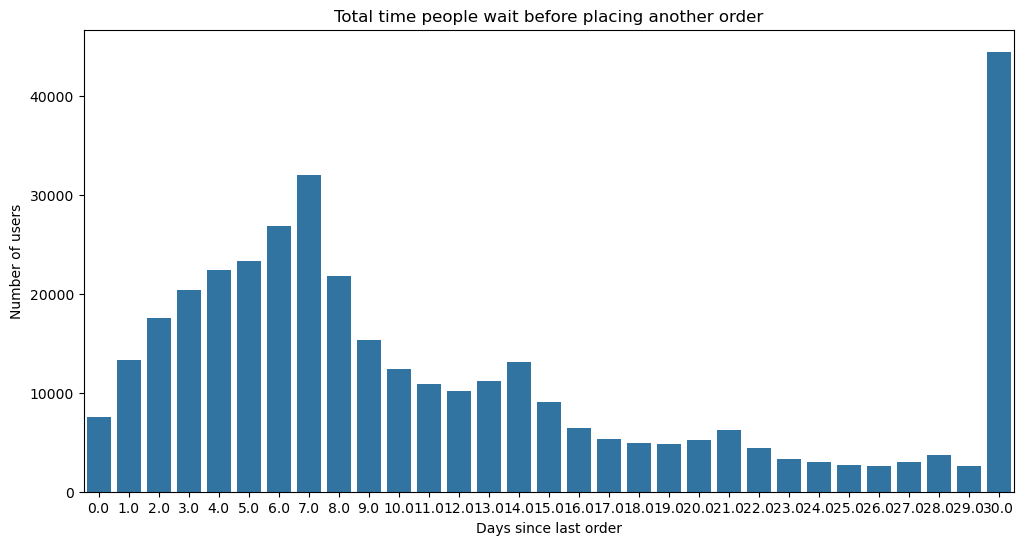

In [53]:
waiting_days = df_orders.groupby('days_since_prior_order')['user_id'].nunique().reset_index() 
plt.figure(figsize=(12,6))
sns.barplot(x='days_since_prior_order', y= 'user_id', data=waiting_days)
plt.xlabel('Days since last order')
plt.ylabel('Number of users')
plt.title('Total time people wait before placing another order')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Most users take 30 days to place another order.

<span style="color: blue; font-family: Arial; font-size: 20px;">
What are the differences between Wednesdays and Saturdays in 'order_hour_of_day'?

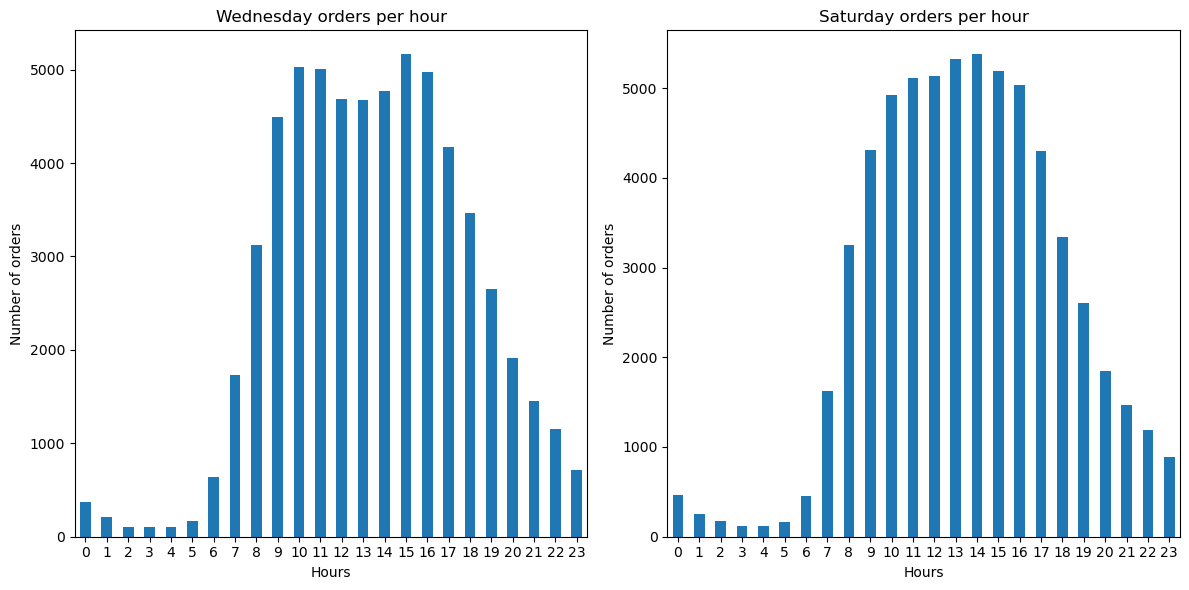

In [56]:
# Selecting wednesdays and saturdays
wed_orders = df_orders[df_orders['order_dow'] == 3]
sat_orders = df_orders[df_orders['order_dow'] == 6]

plt.figure(figsize=(12,6))

# Wednesday chart
plt.subplot(1, 2, 1)
wed_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Wednesday orders per hour')
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.xticks(rotation=0)

# Saturday chart
plt.subplot(1, 2, 2)
sat_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Saturday orders per hour')
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
It is possible to notice that peak times (from 9 am to 5 pm) and times with fewer orders (from midnight to 6 am) are very similar on both days.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Checking the distribution of the number of orders per customer

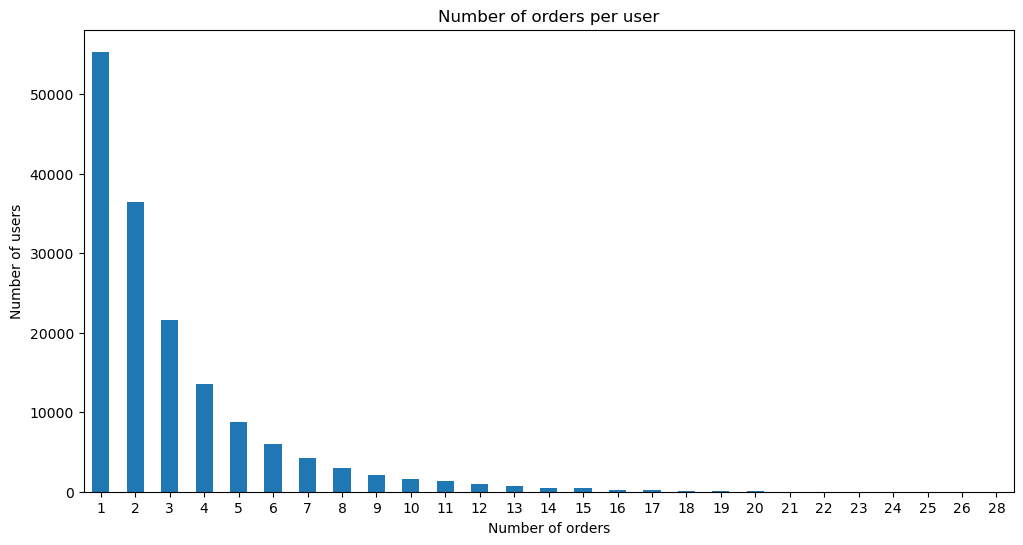

In [59]:
# Orders made by clients
orders_per_user = df_orders.groupby('user_id')['order_id'].nunique()

# clients who did the same number of orders
order_distribution = orders_per_user.value_counts().sort_index()

plt.figure(figsize=(12,6))
order_distribution.plot(kind='bar')
plt.title('Number of orders per user')
plt.xlabel('Number of orders')
plt.ylabel('Number of users')
plt.xticks(rotation=0)

plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
It is possible to notice that most customers made only one order.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Checking the 20 most popular products (showing names and ID's)

In [62]:
# Selecting the most frequent products
frequency_products = pd.merge(df_order_products, df_products[['product_id', 'product_name']])
frequency_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2141543,11440,17,0,Chicken Breast Tenders Breaded
1,567889,1560,1,1,Bag Of Ice
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...
3,491251,8670,35,1,Diced Tomatoes
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk


In [116]:
# Selecting the 20 most popular products
top_products = frequency_products.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending=False).head(20)
top_products

,,order_id,add_to_cart_order,reordered
product_id,product_name,,,
24852,Banana,66050,66050,66050
13176,Bag of Organic Bananas,53297,53297,53297
21137,Organic Strawberries,37039,37039,37039
21903,Organic Baby Spinach,33971,33971,33971
47209,Organic Hass Avocado,29773,29773,29773
47766,Organic Avocado,24689,24689,24689
47626,Large Lemon,21495,21495,21495
16797,Strawberries,20018,20018,20018
26209,Limes,19690,19690,19690


<span style="color: blue; font-family: Arial; font-size: 20px;">
Checking how many items do people typically buy in one order and its distribution

Média de itens por pedido: 10.10


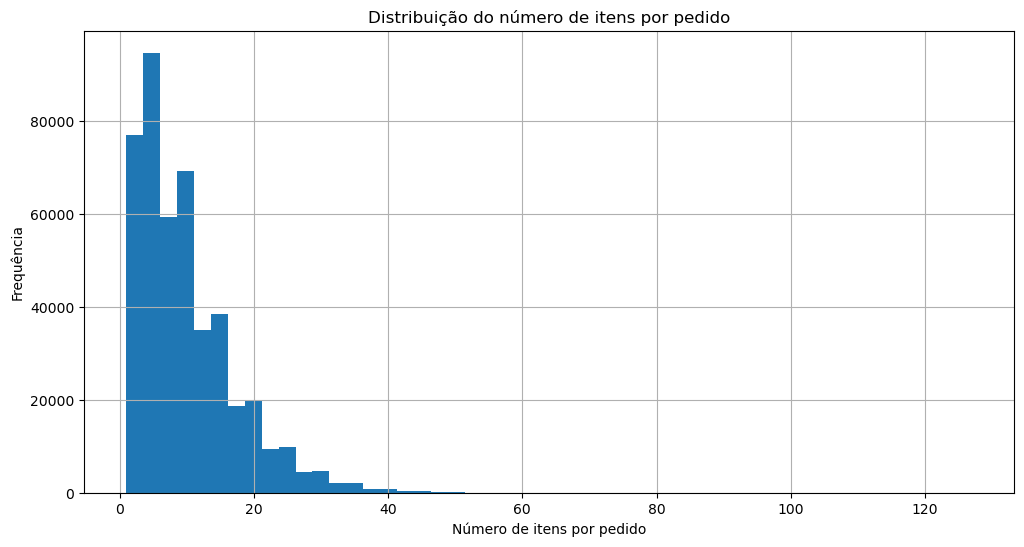

In [66]:
# Counting the number of itens per order
items_per_order = df_order_products.groupby('order_id')['product_id'].count()

# Calculating the average number of items per order
average_itens_per_order = items_per_order.mean()
print(f'Average itens per order: {average_itens_per_order:.2f}')

plt.figure(figsize=(12,6))
items_per_order.plot(kind='hist', bins=50)
plt.title('Number of itens per order')
plt.xlabel('Number of itens')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
People buy an average of 10 products per order.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Checking the top 20 items most frequently included in repeated orders with IDs and names.

In [69]:
reorder_products = df_order_products[df_order_products['reordered'] == 1]
reorder_products.head()

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1


In [70]:
produtos_regulares = pd.merge(reorder_products, df_products[['product_id', 'product_name']])

In [71]:
top_reordered_products = produtos_regulares.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
top_reordered_products.head(20)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

<span style="color: black; font-family: Arial; font-size: 20px;">
The item banana stands out with 55,763 orders.

# Conclusions and recommendations

<span style="color: black; font-family: Arial; font-size: 20px;">
The analysis revealed consistent patterns in purchasing and consumption behavior over time. 

- The highest order volume occurs during peak hours between 9 AM and 5 PM, with the period from 10 AM to 4 PM accounting around 30,000 orders.

- Food items are purchased daily, with Sunday showing the highest sales.

- The average reorder cycle is 30 days; however, most customers place only one order.

- On average, each order contains around 10 items with bananas leading the list of most frequently repeated items (55,763 orders).

---

Recommendations:

1. **Leverage peak hours**  
   - Boost marketing campaigns and promotions between 9 AM and 5 PM, especially from 10 AM to 4 PM, to increase conversions.    

2. **Capitalize on Sunday sales peak**  
   - Create special weekend offers, especially for Sundays.  
   - Plan staffing and logistics to handle high demand.  

3. **Encourage reorders before 30 days**  
   - Launch campaigns with personalized offers for customers inactive for 20–25 days.  
   - Implement loyalty programs to get more frequent purchases.  

4. **Leverage best-selling products**  
   - Highlight bananas and other top 20 items in campaigns, ensuring competitive pricing.  